In [1]:
library(dplyr)
library(ggplot2)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
## load in experimental_results, group by the perturbed region + time
exp <- fread('CRISPRi_experimental_results.txt',header=TRUE)
exp_g <- exp %>% group_by(region,time) %>% summarise(percent_CD69_m = mean(percent_CD69))

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


In [3]:
### get enhancer score from Enformer


# first intersect the pooled CD69 gradients (CD69.all.bedGraph.all.bedGraph) with the perturbed regions using something like:
# bedtools intersect -a CD69.all.bedGraph.all.bedGraph -b perturbed_regions.centered.2kbwindow.bed -wa > CD69.all.bedGraph.all.ATAC.overlap

### then process remaining results as follows
overlaps <- fread('CD69.all.bedGraph.all.ATAC.overlap',header=FALSE)
colnames(overlaps) <- c("chrom","start","stop","gradient","e_chrom","e_start","e_stop")
overlaps$gradient <- abs(overlaps$gradient)
overlaps_g <- overlaps %>% group_by(e_chrom,e_start,e_stop) %>% summarise(sum = sum(gradient))

overlaps_g$region <- "ctrl"
overlaps_g <- overlaps_g %>% mutate(region = replace(region, e_start == 9759943, "prom"),
                                    region = replace(region, e_start == 9764100, "4"),
                                    region = replace(region, e_start == 9740858, "1"),
                                    region = replace(region, e_start == 9772761, "5"),
                                    region = replace(region, e_start == 9750515, "2"),
                                    region = replace(region, e_start == 9757757, "intron"),
                                    region= replace(region, e_start == 9762300, "3"))

ERROR: Error in fread("CD69.all.bedGraph.all.ATAC.overlap", header = FALSE): could not find function "fread"


In [69]:
merge <- merge(overlaps_g, exp_g,by.x = c("region"),by.y = c("region"))

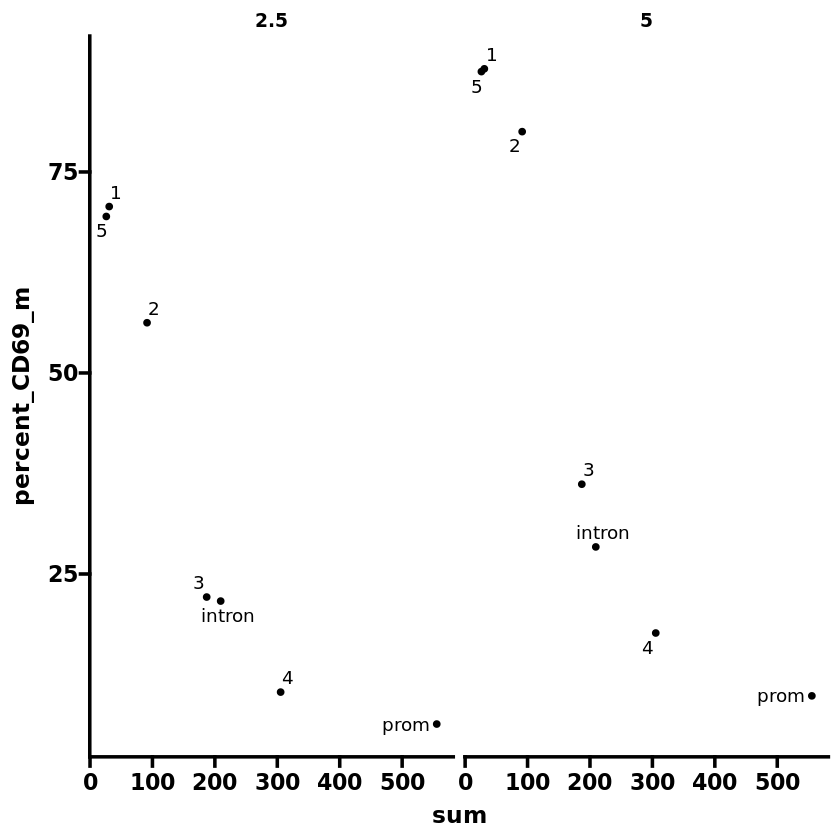

In [49]:
library(ggprism)
library(ggrepel)
ggplot(merge, aes(x=sum, y=percent_CD69_m,label=region)) + geom_point() + theme_prism() + facet_wrap(~time) + geom_text_repel()

In [71]:
colnames(merge) <- c("region", "region_chrom","region_start","region_end","gradient_sum","time", "percent_CD69_mean")
write.table(merge,
            'CRISPRi_enformer_vs_experiment_mean.tsv',
            sep='\t',
            col.names=TRUE,
            row.names=FALSE,
            quote=FALSE)

In [70]:
merge

region,e_chrom,e_start,e_stop,sum,time,percent_CD69_m
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,chr12,9740858,9742858,30.75388,2.5,70.700000
1,chr12,9740858,9742858,30.75388,5.0,87.833333
2,chr12,9750515,9752515,91.37154,2.5,56.250000
2,chr12,9750515,9752515,91.37154,5.0,80.016667
3,chr12,9762300,9764300,186.89399,2.5,22.133333
3,chr12,9762300,9764300,186.89399,5.0,36.166667
4,chr12,9764100,9766100,305.36535,2.5,10.310000
4,chr12,9764100,9766100,305.36535,5.0,17.660000
5,chr12,9772761,9774761,26.08098,2.5,69.466667


In [3]:
9763300 - (9759943 + 1000)

[1] 2357

In [2]:
system("ls -F")